<p style="background-color:#747170;font-family: 'Georgia';color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">Read Data</p>

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import chardet


with open(r"C:\Users\El-Wattaneya\Desktop\Task\AIA_cleaned.csv", 'r', encoding='utf-8') as file:
    aia_text = file.read()

with open(r"C:\Users\El-Wattaneya\Desktop\Task\FIDIC_cleaned.csv", 'r', encoding='utf-8') as file:
    fidic_text = file.read()

with open(r"C:\Users\El-Wattaneya\Desktop\Task\JCT_cleaned.csv", 'r', encoding='utf-8') as file:
    jct_text = file.read()

with open(r"C:\Users\El-Wattaneya\Desktop\Task\Nec_1_cleaned.csv", 'r', encoding='Windows-1252') as file:
    nec1_text = file.read()




<span style="font-size:24px; font-family: 'Georgia', serif; color:#747170; font-weight:bold;"> Print content of each file </span>

In [4]:
print(aia_text[:1000])
print(fidic_text[:1000])
print(jct_text[:1000])
print(nec1_text[:1000])



" basic definitions the term actual cost means the cost of the work as that term is defined in article a., plus all earned goal achievement compensation."
"the actual cost and the cost of the work do not include costs or expenses the owner independently incurs to plan, design, estimate, schedule, manage, construct, commission and closeout the project or the cost of any contracts the owner enters into with a separate contractor, unless specifically allowed pursuant to section ..."
"architects services the term architects services means the professional services, including the planning, design, and construction contract administration, required of the architect by the contract documents, whether completed or partially completed, and includes all other labor or services provided, or to be provided, by the architect to fulfill the architects obligations."
"contractors work the term contractors work means the construction and services required of the contractor by the contract documents, wh

<span style="font-size:24px; font-family: 'Georgia', serif; color:#747170; font-weight:bold;"> Convert to small letters </span>

In [6]:
import re

def clean_text(text):
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', ' ', text) 
    text = re.sub(r'\d+', ' ', text) 
    
    return text

aia_text_clean = clean_text(aia_text)
fidic_text_clean = clean_text(fidic_text)
jct_text_clean = clean_text(jct_text)
nec_text_clean = clean_text(nec1_text)

print(aia_text_clean[:1000])
print(fidic_text_clean[:1000])
print(jct_text_clean[:1000])
print(nec1_text[:1000])



  basic definitions the term actual cost means the cost of the work as that term is defined in article a   plus all earned goal achievement compensation  
 the actual cost and the cost of the work do not include costs or expenses the owner independently incurs to plan  design  estimate  schedule  manage  construct  commission and closeout the project or the cost of any contracts the owner enters into with a separate contractor  unless specifically allowed pursuant to section     
 architects services the term architects services means the professional services  including the planning  design  and construction contract administration  required of the architect by the contract documents  whether completed or partially completed  and includes all other labor or services provided  or to be provided  by the architect to fulfill the architects obligations  
 contractors work the term contractors work means the construction and services required of the contractor by the contract documents  wh

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text_with_stopwords(text):
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', ' ', text)  
    text = re.sub(r'\d+', ' ', text)  
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text)
    filtered_text = ' '.join([word for word in word_tokens if word not in stop_words])
    
    return filtered_text

aia_text_clean = clean_text_with_stopwords(aia_text)
fidic_text_clean = clean_text_with_stopwords(fidic_text)
jct_text_clean = clean_text_with_stopwords(jct_text)
nec1_text_clean = clean_text_with_stopwords(nec1_text)


[nltk_data] Downloading package stopwords to C:\Users\El-
[nltk_data]     Wattaneya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\El-
[nltk_data]     Wattaneya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
print("AIA Text Cleaned:")
print(aia_text_clean)
print("\nFIDIC Text Cleaned:")
print(fidic_text_clean)
print("\nJCT Text Cleaned:")
print(jct_text_clean)
print("\nNEC Text Cleaned:")
print(nec1_text_clean)


AIA Text Cleaned:
basic definitions term actual cost means cost work term defined article plus earned goal achievement compensation actual cost cost work include costs expenses owner independently incurs plan design estimate schedule manage construct commission closeout project cost contracts owner enters separate contractor unless specifically allowed pursuant section architects services term architects services means professional services including planning design construction contract administration required architect contract documents whether completed partially completed includes labor services provided provided architect fulfill architects obligations contractors work term contractors work means construction services required contractor contract documents whether completed partially completed includes labor materials equipment services provided provided contractor fulfill contractors obligations work term work means construction services including contractors work architects ser

<span style="font-size:24px; font-family: 'Georgia', serif; color:#237170; font-weight:bold;"> Seed Topics </span>

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

seed_topics = {
    "Topic 1":  "contract administrator project manager option variation data instruction approval direction documentation correspondence notice submission issue decision consent",

    "Topic 2": "sequence duration eot completion subcontract key program schedule extension of time milestone critical path delay timeline acceleration progress early warning",

    "Topic 3": "profit money budget cost expense pay payment valuation interim payment final account invoice retention financial adjustment variation cost reimbursement price adjustment",

    "Topic 4": "penalty liability breach termination damage currency indemnity force majeure uninsured risks delay damages liquidated damages limitation of liability warranty consequential loss third-party liability",

    "Topic 5": "settlement arbitration resolution fair daab claim adjudication mediation litigation notice of dispute amicable settlement dispute board arbitration rules expert determination binding decision",

    "Topic 6":  "insurance coverage warranty guarantee risk decision indemnity bond performance security contractors all risk professional indemnity surety advance payment bond third-party insurance defects liability health and safety"
}

In [11]:
documents = [aia_text_clean, fidic_text_clean, jct_text_clean, nec_text_clean]


In [13]:
all_texts = list(seed_topics.values()) + documents

In [14]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

<span style="font-size:24px; font-family: 'Georgia', serif; color:#237170; font-weight:bold;"> Similarities With Each Topic </span>

In [15]:
document_start_index = len(seed_topics)
results = {}  

for doc_index in range(document_start_index, len(all_texts)):
    doc_vector = tfidf_matrix[doc_index]
    similarities = cosine_similarity(doc_vector, tfidf_matrix[:document_start_index])
    
    doc_results = {}
    for topic_index, similarity in enumerate(similarities[0]):
        percentage_similarity = similarity * 100
        doc_results[list(seed_topics.keys())[topic_index]] = percentage_similarity
    
    results[f"Document {doc_index - document_start_index + 1}"] = doc_results

for doc_name, doc_results in results.items():
    print(f"{doc_name} similarities with each topic (as percentage):")
    for topic_name, similarity in doc_results.items():
        print(f"  {topic_name}: {similarity:.2f}%")
    print()

Document 1 similarities with each topic (as percentage):
  Topic 1: 12.11%
  Topic 2: 2.75%
  Topic 3: 8.55%
  Topic 4: 4.05%
  Topic 5: 2.63%
  Topic 6: 10.08%

Document 2 similarities with each topic (as percentage):
  Topic 1: 10.34%
  Topic 2: 4.49%
  Topic 3: 7.67%
  Topic 4: 4.50%
  Topic 5: 6.86%
  Topic 6: 7.96%

Document 3 similarities with each topic (as percentage):
  Topic 1: 15.52%
  Topic 2: 4.07%
  Topic 3: 8.22%
  Topic 4: 5.59%
  Topic 5: 3.89%
  Topic 6: 9.83%

Document 4 similarities with each topic (as percentage):
  Topic 1: 5.34%
  Topic 2: 3.13%
  Topic 3: 0.44%
  Topic 4: 1.65%
  Topic 5: 1.93%
  Topic 6: 4.14%



<span style="font-size:24px; font-family: 'Georgia', serif; color:#237170; font-weight:bold;"> Similarities With Topic 4 </span>

In [16]:
document_4_results = results["Document 4"]

print("Document 4 similarities with each topic (as percentage):")
for topic_name, similarity in document_4_results.items():
    print(f"  {topic_name}: {similarity:.2f}%")


Document 4 similarities with each topic (as percentage):
  Topic 1: 5.34%
  Topic 2: 3.13%
  Topic 3: 0.44%
  Topic 4: 1.65%
  Topic 5: 1.93%
  Topic 6: 4.14%


<p style="background-color:#747170;font-family: 'Georgia';color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">Create GUI</p>

In [17]:
import tkinter as tk
from tkinter import ttk

def calculate_similarity():
    document_start_index = len(seed_topics)
    results = {}  

    for doc_index in range(document_start_index, len(all_texts)):
        doc_vector = tfidf_matrix[doc_index]
        similarities = cosine_similarity(doc_vector, tfidf_matrix[:document_start_index])
        
        doc_results = {}
        for topic_index, similarity in enumerate(similarities[0]):
            percentage_similarity = similarity * 100
            doc_results[list(seed_topics.keys())[topic_index]] = percentage_similarity
        
        results[f"Document {doc_index - document_start_index + 1}"] = doc_results
    
    return results


root = tk.Tk()
root.title("Document Similarity Viewer")

def show_results(doc_name, results):
    result_text.delete(1.0, tk.END)
    doc_results = results.get(doc_name, {})
    result_text.insert(tk.END, f"{doc_name} similarities with each topic:\n")
    for topic_name, similarity in doc_results.items():
        result_text.insert(tk.END, f"  {topic_name}: {similarity:.2f}%\n")

results = calculate_similarity()

button_frame = ttk.Frame(root)
button_frame.pack(pady=10)

for doc_name in results.keys():
    button = ttk.Button(button_frame, text=doc_name, command=lambda doc=doc_name: show_results(doc, results))
    button.pack(side=tk.LEFT, padx=5)

result_text = tk.Text(root, wrap=tk.WORD, width=50, height=20)
result_text.pack(padx=10, pady=10)

root.mainloop()

<p style="background-color:#747170;font-family: 'Georgia';color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">Visualization</p>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

data = []
for doc_name, doc_results in results.items():
    for topic_name, similarity in doc_results.items():
        data.append({
            'Document': doc_name,
            'Topic': topic_name,
            'Similarity (%)': similarity
        })

df = pd.DataFrame(data)




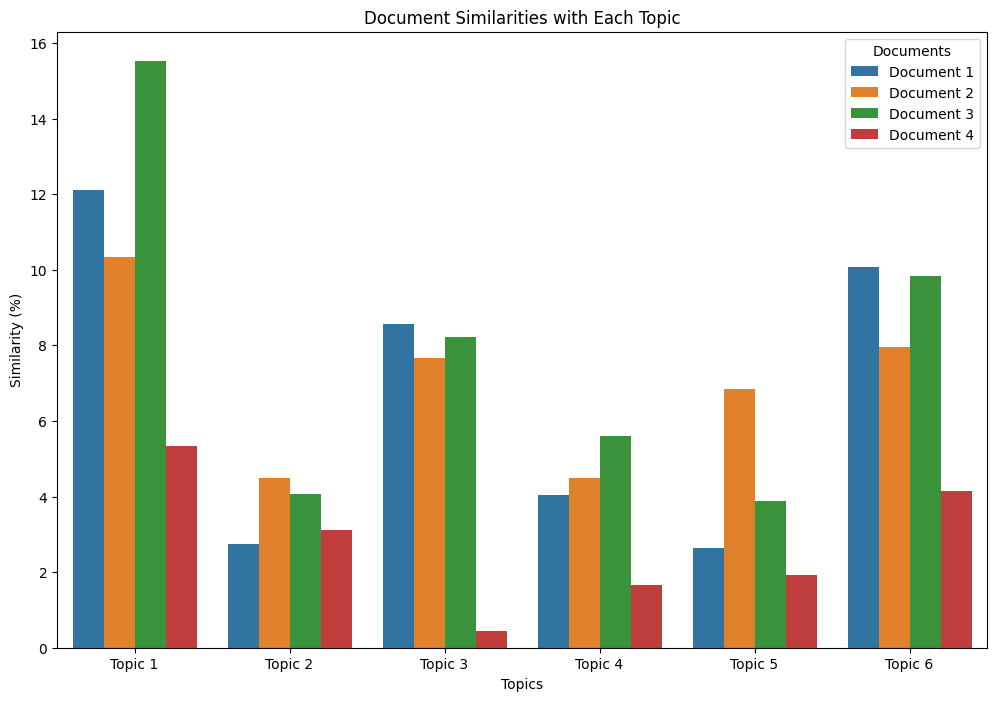

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Topic', y='Similarity (%)', hue='Document', data=df)

plt.title('Document Similarities with Each Topic')
plt.xlabel('Topics')
plt.ylabel('Similarity (%)')

plt.legend(title='Documents')
plt.show()

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10544\2796615532.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("Document", "Topic", "Similarity (%)")


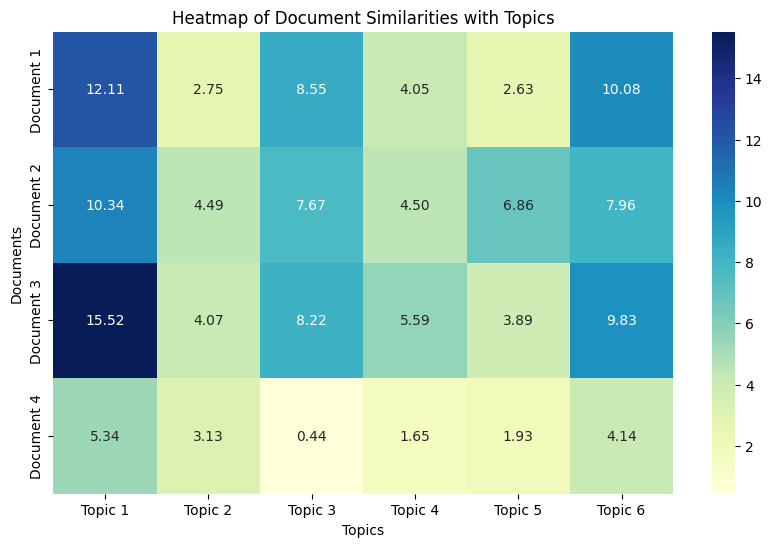

In [20]:
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot("Document", "Topic", "Similarity (%)")
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")

plt.title('Heatmap of Document Similarities with Topics')
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.show()


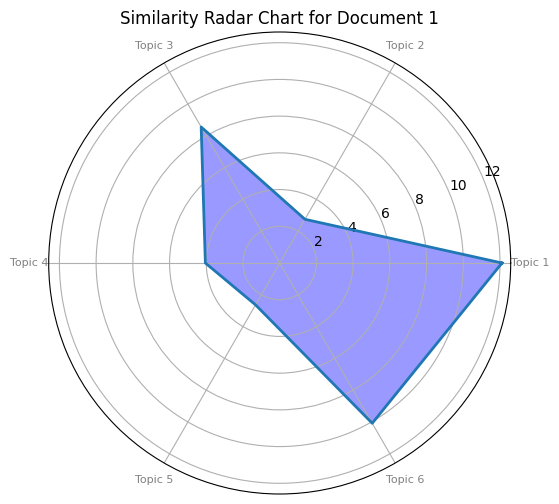

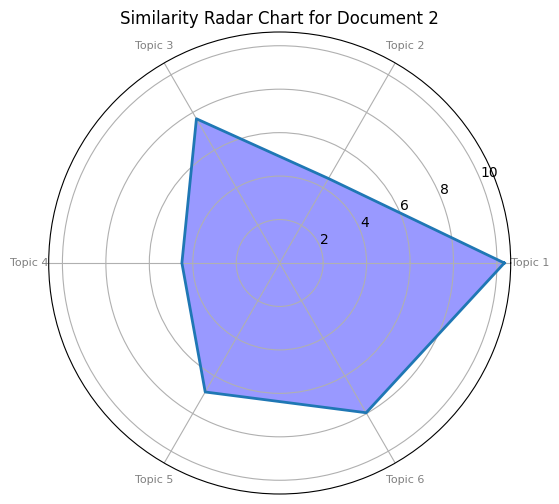

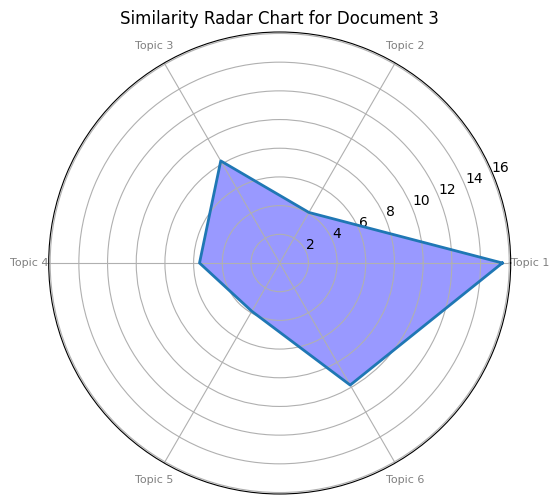

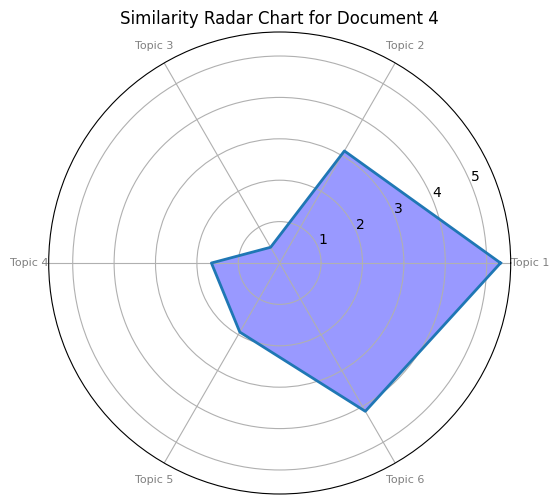

In [21]:
from math import pi

categories = list(seed_topics.keys())
N = len(categories)

for doc_name, doc_results in results.items():
    values = list(doc_results.values())
    values += values[:1]  
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.4)
    
    plt.title(f"Similarity Radar Chart for {doc_name}")
    plt.show()


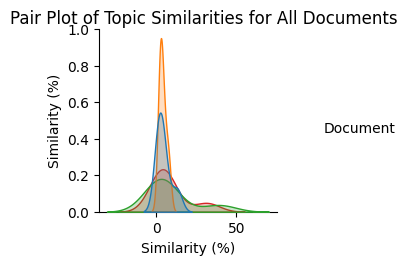

In [50]:
sns.pairplot(df, hue="Document", kind="scatter", diag_kind="kde")
plt.suptitle('Pair Plot of Topic Similarities for All Documents', y=1.02)
plt.show()


C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_11872\4169191708.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivot = df.pivot("Document", "Topic", "Similarity (%)")


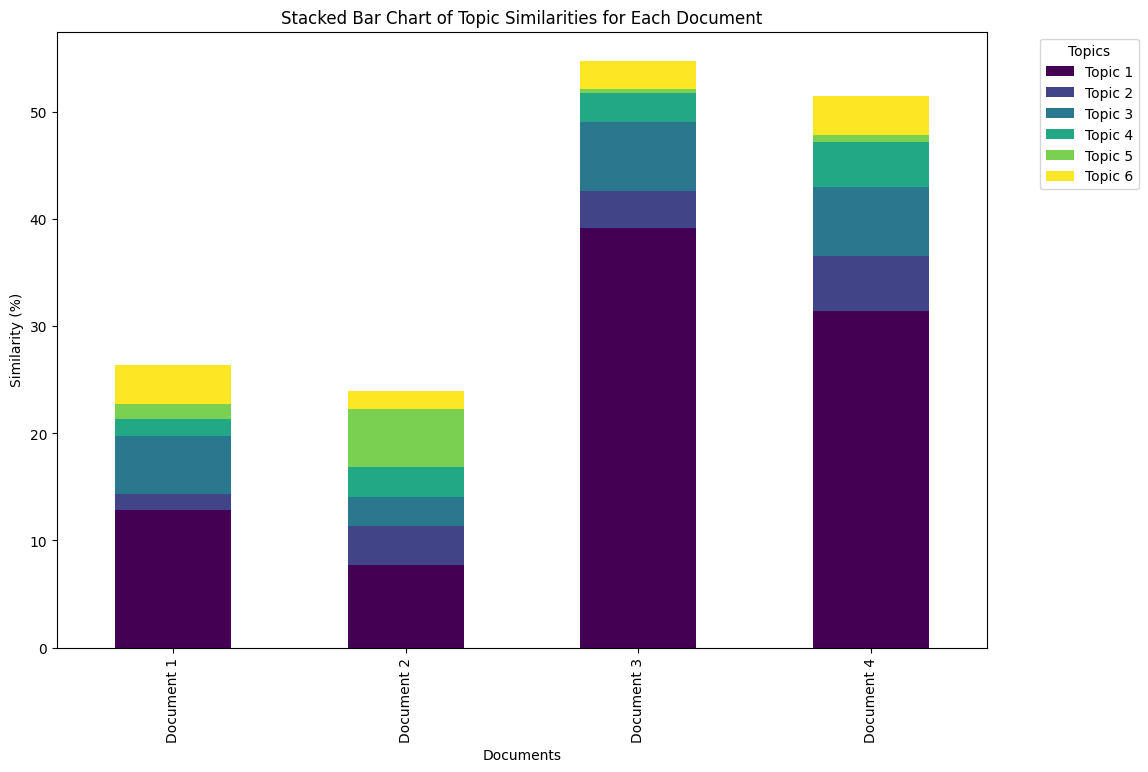

In [53]:
df_pivot = df.pivot("Document", "Topic", "Similarity (%)")

df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")

plt.title('Stacked Bar Chart of Topic Similarities for Each Document')
plt.xlabel('Documents')
plt.ylabel('Similarity (%)')

plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
